In [17]:
import pandas as pd
import statsmodels.formula.api as smf

df_6 = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Exploration\5\df_6.csv')
df_6


,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,has_accident_before_2006,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color,simple_family
0,2024-10-17,0,CA,6037,0.0,0.0,-2.0,0.0,-6.0,0,Los Angeles,-118.224703,34.321346,W,Growth Management,green,Los Angeles,#1f77b4,Reform
1,2024-11-17,0,CA,6019,0.0,-1.0,0.0,0.0,1.0,0,Fresno,-119.650683,36.758077,W,Growth Management,green,Sacramento,#1f77b4,Reform
2,2024-12-06,0,ID,16001,0.0,0.0,0.0,0.0,0.0,0,Ada,-116.241035,43.450841,W,High Density,orange,Salt Lake City,#1f77b4,Traditional
3,2024-11-22,0,ID,16001,0.0,0.0,0.0,0.0,0.0,0,Ada,-116.241035,43.450841,W,High Density,orange,Salt Lake City,#1f77b4,Traditional
4,2024-12-05,0,IL,17159,0.0,0.0,0.0,0.0,0.0,0,Richland,-88.085602,38.712287,MW,Middle America,orange,Cincinnati (IN),#d62728,Traditional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41590,1997-09-23,0,SD,46099,1.0,0.0,0.0,-1.0,-1.0,0,Minnehaha,-96.791455,43.674134,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional
41591,2000-07-16,0,SD,46093,2.0,0.0,0.0,1.0,5.0,0,Meade,-102.716646,44.566675,W,Growth Control,green,Denver,#1f77b4,Reform
41592,2001-02-03,0,SD,46099,1.0,0.0,0.0,-1.0,-1.0,0,Minnehaha,-96.791455,43.674134,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional
41593,1999-01-20,0,SD,46099,1.0,0.0,0.0,-1.0,-1.0,0,Minnehaha,-96.791455,43.674134,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional


In [18]:
import pandas as pd

threshold = 1
# Assuming df_6 is already defined
# Split the DataFrame
treatment_df = df_6[df_6['FATALITIES'] > threshold]
control_df = df_6[df_6['FATALITIES'] <= threshold]



# Compare the distribution of STATE, Region, and simple_family
print("\nDistribution of STATE in Treatment DataFrame:")
print(treatment_df['STATE'].value_counts(normalize=True))

print("\nDistribution of STATE in Control DataFrame:")
print(control_df['STATE'].value_counts(normalize=True))

print("\nDistribution of Region in Treatment DataFrame:")
print(treatment_df['Region'].value_counts(normalize=True))

print("\nDistribution of Region in Control DataFrame:")
print(control_df['Region'].value_counts(normalize=True))

print("\nDistribution of simple_family in Treatment DataFrame:")
print(treatment_df['simple_family'].value_counts(normalize=True))

print("\nDistribution of simple_family in Control DataFrame:")
print(control_df['simple_family'].value_counts(normalize=True))


Distribution of STATE in Treatment DataFrame:
STATE
CA    0.142132
SC    0.055838
TN    0.055838
TX    0.050761
AR    0.045685
NC    0.045685
FL    0.045685
NY    0.035533
NV    0.035533
IA    0.035533
AZ    0.030457
OH    0.030457
LA    0.030457
GA    0.030457
OR    0.025381
CO    0.020305
NJ    0.020305
WI    0.020305
NE    0.020305
NM    0.020305
OK    0.020305
IL    0.015228
MD    0.015228
KS    0.015228
IN    0.010152
AL    0.010152
ME    0.010152
MT    0.010152
WA    0.010152
MO    0.010152
ID    0.010152
KY    0.010152
MS    0.010152
VA    0.005076
WV    0.005076
MN    0.005076
MI    0.005076
WY    0.005076
RI    0.005076
MA    0.005076
PA    0.005076
CT    0.005076
Name: proportion, dtype: float64

Distribution of STATE in Control DataFrame:
STATE
CA    0.118194
SC    0.060752
NJ    0.060075
NY    0.053384
NC    0.053312
MD    0.042707
FL    0.038021
IL    0.032973
WI    0.030726
MA    0.028866
MI    0.026354
OH    0.025798
AL    0.024905
KY    0.024059
GA    0.023890
MO    0.

In [19]:
import pandas as pd

# Sample dataframes
# treatment_df = pd.DataFrame({'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West']})
# control_df = pd.DataFrame({'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North']})

# Calculate counts and percentages for treatment_df
treatment_counts = treatment_df['Region'].value_counts()
treatment_percentages = treatment_df['Region'].value_counts(normalize=True) * 100

# Calculate counts and percentages for control_df
control_counts = control_df['Region'].value_counts()
control_percentages = control_df['Region'].value_counts(normalize=True) * 100

# Combine the results into a single dataframe
balancing_table = pd.DataFrame({
    'Treatment Count': treatment_counts,
    'Treatment Percentage': treatment_percentages,
    'Control Count': control_counts,
    'Control Percentage': control_percentages
}).fillna(0)  # Fill NaN values with 0 for regions not present in one of the dataframes

# Display the balancing table
print(balancing_table)

        Treatment Count  Treatment Percentage  Control Count  \
Region                                                         
S                    83             42.131980          15189   
W                    65             32.994924           9919   
MW                   32             16.243655           8242   
NE                   17              8.629442           8048   

        Control Percentage  
Region                      
S                36.690178  
W                23.960095  
MW               19.909174  
NE               19.440553  


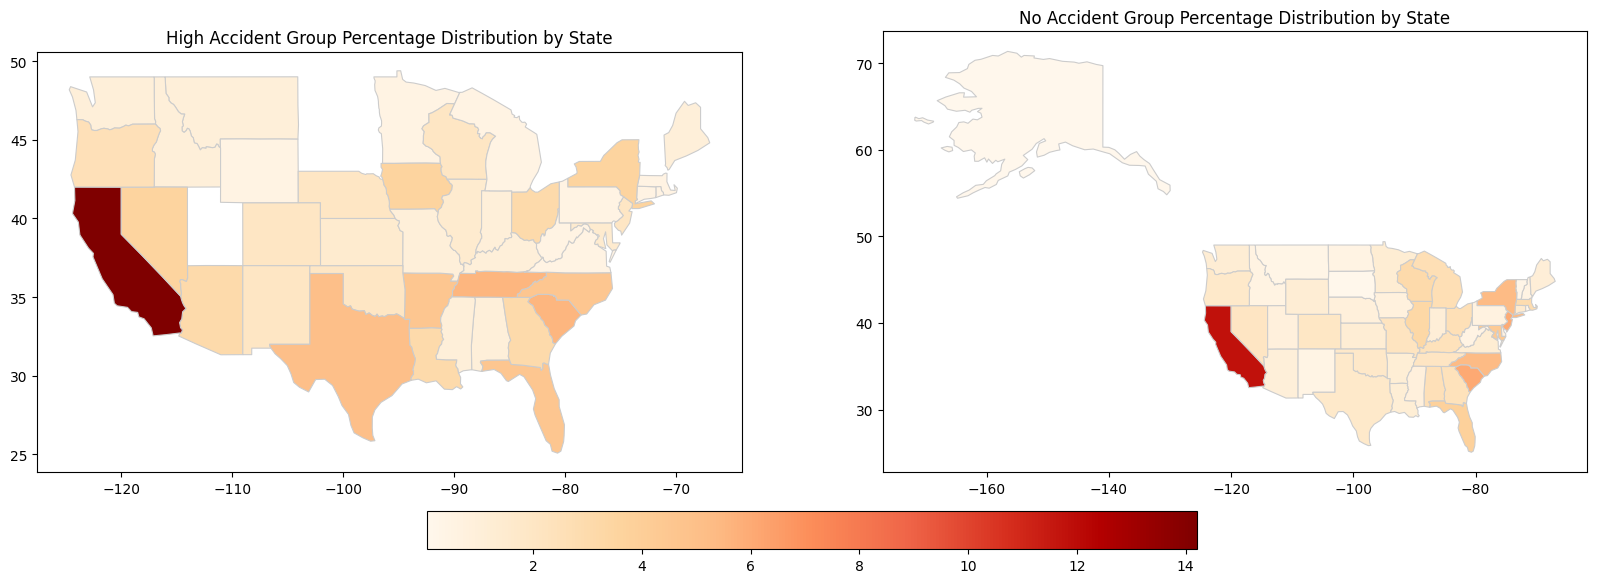

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming treatment_df and control_df are already defined

# Calculate percentage distribution for treatment_df
treatment_state_dist = treatment_df['STATE'].value_counts(normalize=True) * 100

# Calculate percentage distribution for control_df
control_state_dist = control_df['STATE'].value_counts(normalize=True) * 100

# Load the US states shapefile
shapefile_path = r'C:\Users\clint\Desktop\Research-Paper-Trucks\Exploration\5\ne_110m_admin_1_states_provinces\ne_110m_admin_1_states_provinces.shp'
us_states = gpd.read_file(shapefile_path)

# Filter for US states only
us_states = us_states[us_states['admin'] == 'United States of America']

# Merge the percentage distributions with the US states GeoDataFrame
us_states = us_states.set_index('postal')
us_states['Treatment'] = treatment_state_dist
us_states['Control'] = control_state_dist

# Define the color normalization based on the combined range of both distributions
vmin = min(us_states['Treatment'].min(), us_states['Control'].min())
vmax = max(us_states['Treatment'].max(), us_states['Control'].max())
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Plot the maps
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

cmap = 'OrRd'

us_states.plot(column='Treatment', cmap=cmap, linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=False, norm=norm)
axes[0].set_title('High Accident Group Percentage Distribution by State')

us_states.plot(column='Control', cmap=cmap, linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=False, norm=norm)
axes[1].set_title('No Accident Group Percentage Distribution by State')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
fig.colorbar(sm, ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)

plt.show()

Balancing Table:
        Treatment Count  Treatment Percentage  Control Count  \
Region                                                         
S                    83             42.131980          15189   
W                    65             32.994924           9919   
MW                   32             16.243655           8242   
NE                   17              8.629442           8048   

        Control Percentage  
Region                      
S                36.690178  
W                23.960095  
MW               19.909174  
NE               19.440553  


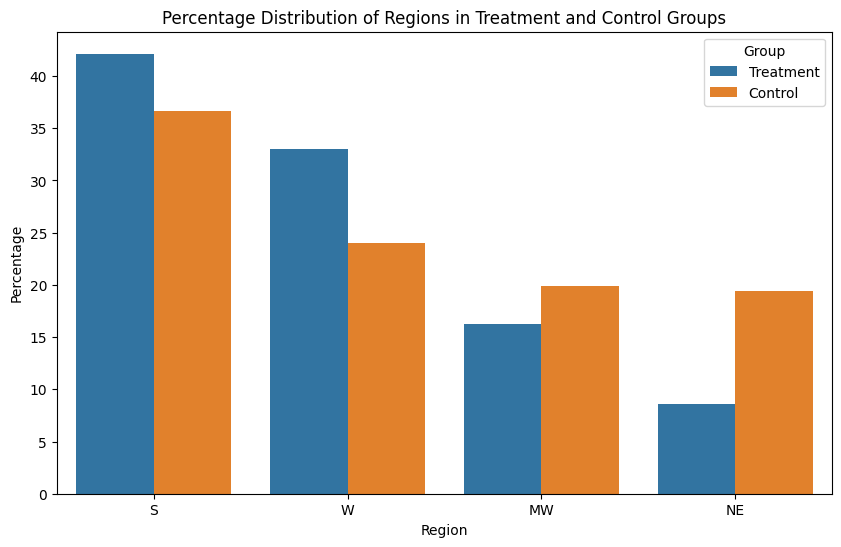

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataframes
# treatment_df = pd.DataFrame({'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West']})
# control_df = pd.DataFrame({'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North']})

# Calculate counts and percentages for treatment_df
treatment_counts = treatment_df['Region'].value_counts()
treatment_percentages = treatment_df['Region'].value_counts(normalize=True) * 100

# Calculate counts and percentages for control_df
control_counts = control_df['Region'].value_counts()
control_percentages = control_df['Region'].value_counts(normalize=True) * 100

# Combine the results into a balancing table
balancing_table = pd.DataFrame({
    'Treatment Count': treatment_counts,
    'Treatment Percentage': treatment_percentages,
    'Control Count': control_counts,
    'Control Percentage': control_percentages
}).fillna(0)  # Fill NaN values with 0 for regions not present in one of the dataframes

# Display the balancing table
print("Balancing Table:")
print(balancing_table)

# Combine the distributions into a single dataframe for plotting
distribution_df = pd.DataFrame({
    'Region': treatment_percentages.index,
    'Treatment': treatment_percentages.values,
    'Control': control_percentages.reindex(treatment_percentages.index, fill_value=0).values
})

# Melt the dataframe for plotting
distribution_df = distribution_df.melt(id_vars='Region', var_name='Group', value_name='Percentage')

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Percentage', hue='Group', data=distribution_df)
plt.title('Percentage Distribution of Regions in Treatment and Control Groups')
plt.ylabel('Percentage')
plt.xlabel('Region')
plt.show()

Balancing Table for STATE:
       Treatment Count  Treatment Percentage  Control Count  \
STATE                                                         
AK                 0.0              0.000000             23   
AL                 2.0              1.015228           1031   
AR                 9.0              4.568528            503   
AZ                 6.0              3.045685            420   
CA                28.0             14.213198           4893   
CO                 4.0              2.030457            810   
CT                 1.0              0.507614            645   
DE                 0.0              0.000000            259   
FL                 9.0              4.568528           1574   
GA                 6.0              3.045685            989   
IA                 7.0              3.553299            343   
ID                 2.0              1.015228            238   
IL                 3.0              1.522843           1365   
IN                 2.0      

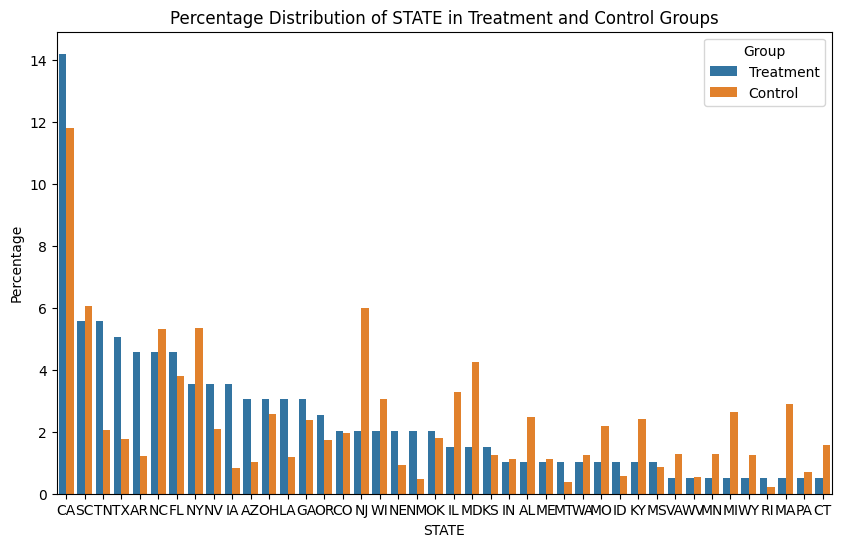

Balancing Table for Region:
        Treatment Count  Treatment Percentage  Control Count  \
Region                                                         
S                    83             42.131980          15189   
W                    65             32.994924           9919   
MW                   32             16.243655           8242   
NE                   17              8.629442           8048   

        Control Percentage  
Region                      
S                36.690178  
W                23.960095  
MW               19.909174  
NE               19.440553  




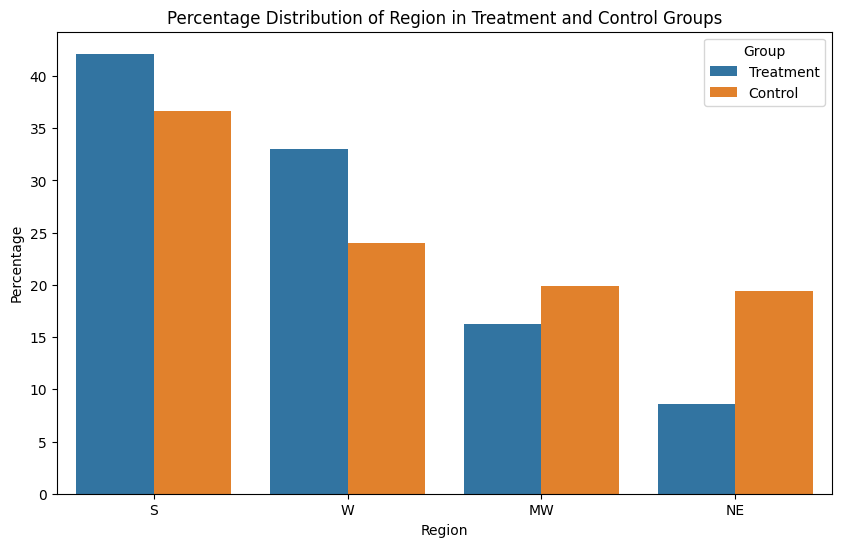

Balancing Table for simple_family:
               Treatment Count  Treatment Percentage  Control Count  \
simple_family                                                         
Exclusion                    5              2.538071           2367   
Reform                      92             46.700508          15114   
Traditional                 89             45.177665          23054   
Wild Texas                  11              5.583756            863   

               Control Percentage  
simple_family                      
Exclusion                5.717668  
Reform                  36.509010  
Traditional             55.688681  
Wild Texas               2.084642  




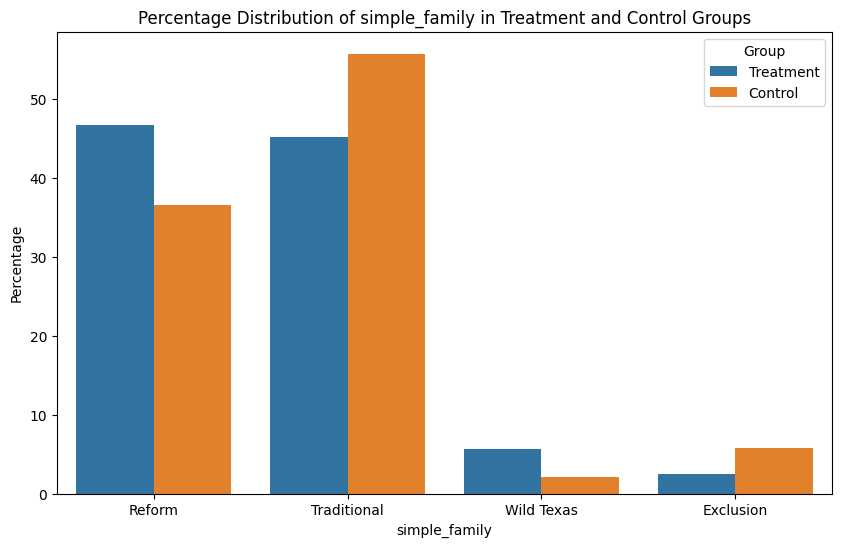

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataframes
# treatment_df = pd.DataFrame({
#     'STATE': ['CA', 'NY', 'TX', 'CA', 'TX', 'NY', 'CA', 'TX'],
#     'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West'],
#     'simple_family': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B']
# })
# control_df = pd.DataFrame({
#     'STATE': ['CA', 'NY', 'TX', 'CA', 'TX', 'NY', 'CA', 'TX', 'NY'],
#     'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North'],
#     'simple_family': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A']
# })

def create_balancing_table_and_plot(treatment_df, control_df, column_name):
    # Calculate counts and percentages for treatment_df
    treatment_counts = treatment_df[column_name].value_counts()
    treatment_percentages = treatment_df[column_name].value_counts(normalize=True) * 100

    # Calculate counts and percentages for control_df
    control_counts = control_df[column_name].value_counts()
    control_percentages = control_df[column_name].value_counts(normalize=True) * 100

    # Combine the results into a balancing table
    balancing_table = pd.DataFrame({
        'Treatment Count': treatment_counts,
        'Treatment Percentage': treatment_percentages,
        'Control Count': control_counts,
        'Control Percentage': control_percentages
    }).fillna(0)  # Fill NaN values with 0 for categories not present in one of the dataframes

    # Display the balancing table
    print(f"Balancing Table for {column_name}:")
    print(balancing_table)
    print("\n")

    # Combine the distributions into a single dataframe for plotting
    distribution_df = pd.DataFrame({
        column_name: treatment_percentages.index,
        'Treatment': treatment_percentages.values,
        'Control': control_percentages.reindex(treatment_percentages.index, fill_value=0).values
    })

    # Melt the dataframe for plotting
    distribution_df = distribution_df.melt(id_vars=column_name, var_name='Group', value_name='Percentage')

    # Plot the distributions
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_name, y='Percentage', hue='Group', data=distribution_df)
    plt.title(f'Percentage Distribution of {column_name} in Treatment and Control Groups')
    plt.ylabel('Percentage')
    plt.xlabel(column_name)
    plt.show()

# List of columns to analyze
columns_to_analyze = ['STATE', 'Region', 'simple_family']

# Generate balancing tables and plots for each column
for column in columns_to_analyze:
    create_balancing_table_and_plot(treatment_df, control_df, column)

Balancing Table for STATE:
       High Accident Count  High Accident Percentage  No Accident Count  \
STATE                                                                     
AK                     0.0                  0.000000                 23   
AL                     2.0                  1.015228               1031   
AR                     9.0                  4.568528                503   
AZ                     6.0                  3.045685                420   
CA                    28.0                 14.213198               4893   
CO                     4.0                  2.030457                810   
CT                     1.0                  0.507614                645   
DE                     0.0                  0.000000                259   
FL                     9.0                  4.568528               1574   
GA                     6.0                  3.045685                989   
IA                     7.0                  3.553299                343  

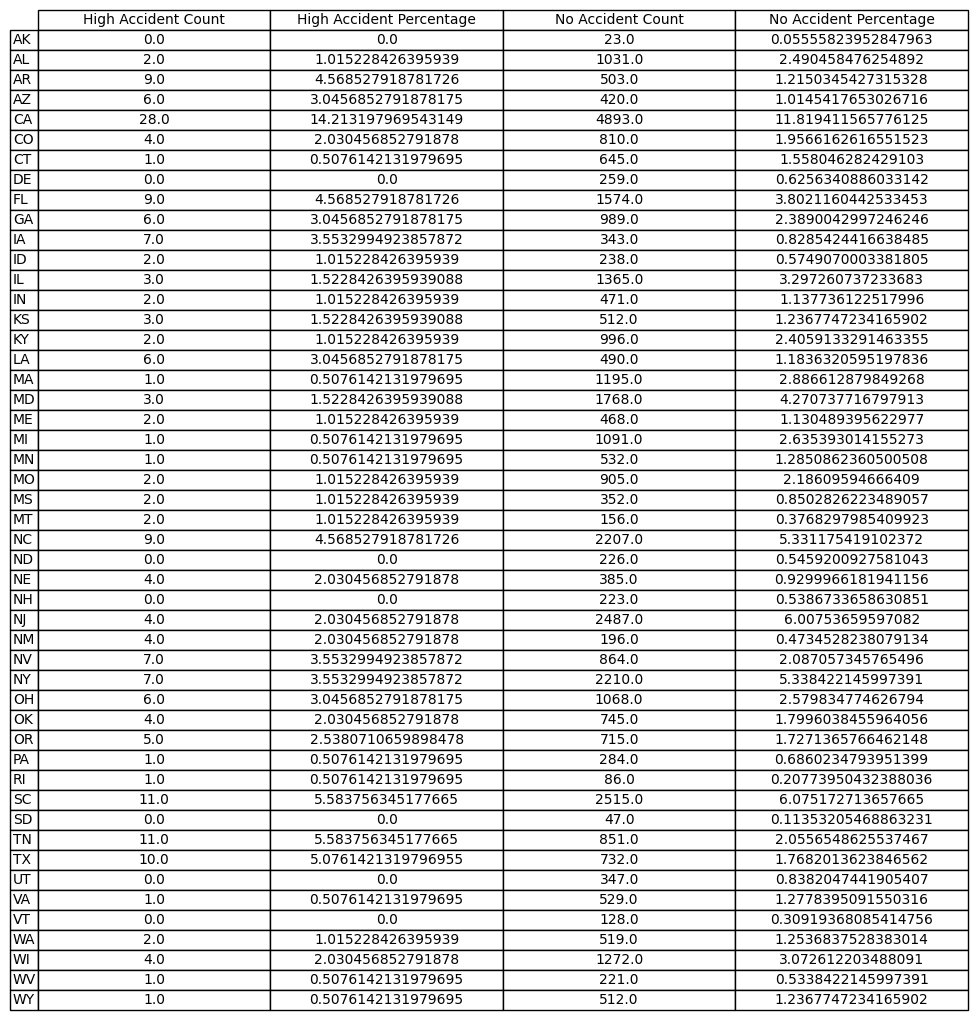

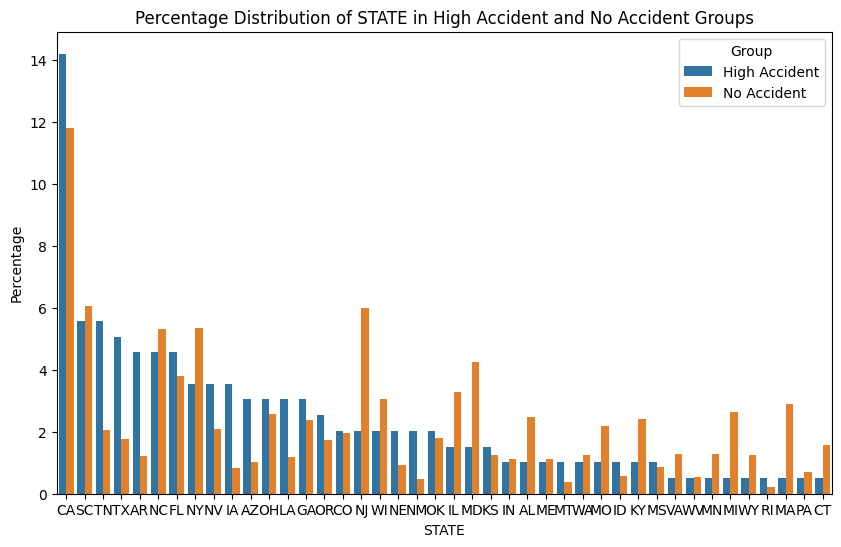

Balancing Table for Region:
        High Accident Count  High Accident Percentage  No Accident Count  \
Region                                                                     
S                        83                 42.131980              15189   
W                        65                 32.994924               9919   
MW                       32                 16.243655               8242   
NE                       17                  8.629442               8048   

        No Accident Percentage  
Region                          
S                    36.690178  
W                    23.960095  
MW                   19.909174  
NE                   19.440553  




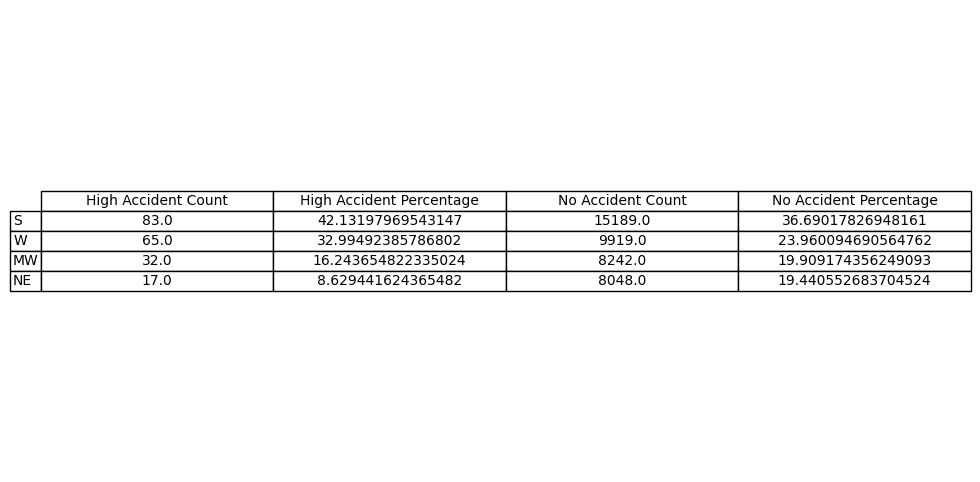

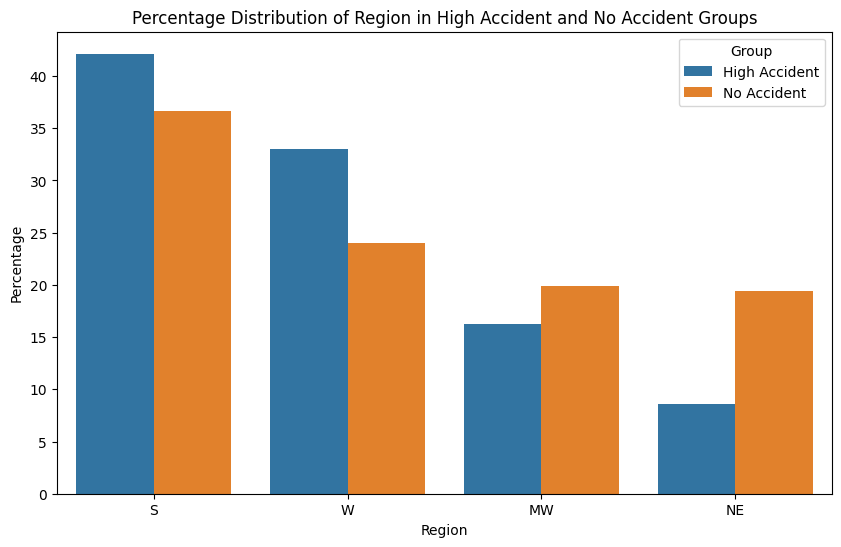

Balancing Table for simple_family:
               High Accident Count  High Accident Percentage  \
simple_family                                                  
Exclusion                        5                  2.538071   
Reform                          92                 46.700508   
Traditional                     89                 45.177665   
Wild Texas                      11                  5.583756   

               No Accident Count  No Accident Percentage  
simple_family                                             
Exclusion                   2367                5.717668  
Reform                     15114               36.509010  
Traditional                23054               55.688681  
Wild Texas                   863                2.084642  




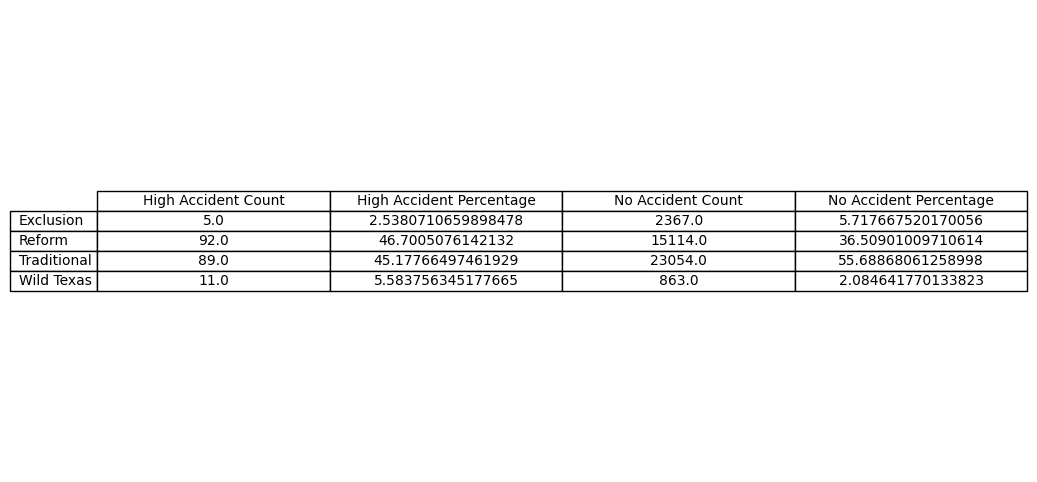

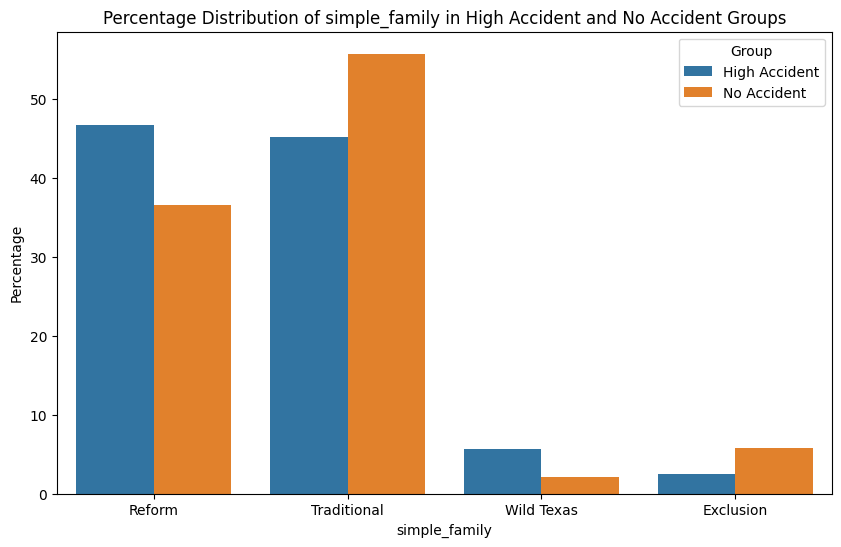

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataframes
# treatment_df = pd.DataFrame({
#     'STATE': ['CA', 'NY', 'TX', 'CA', 'TX', 'NY', 'CA', 'TX'],
#     'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West'],
#     'simple_family': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B']
# })
# control_df = pd.DataFrame({
#     'STATE': ['CA', 'NY', 'TX', 'CA', 'TX', 'NY', 'CA', 'TX', 'NY'],
#     'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North'],
#     'simple_family': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A']
# })

def create_balancing_table_and_plot(treatment_df, control_df, column_name):
    # Calculate counts and percentages for treatment_df
    treatment_counts = treatment_df[column_name].value_counts()
    treatment_percentages = treatment_df[column_name].value_counts(normalize=True) * 100

    # Calculate counts and percentages for control_df
    control_counts = control_df[column_name].value_counts()
    control_percentages = control_df[column_name].value_counts(normalize=True) * 100

    # Combine the results into a balancing table
    balancing_table = pd.DataFrame({
        'High Accident Count': treatment_counts,
        'High Accident Percentage': treatment_percentages,
        'No Accident Count': control_counts,
        'No Accident Percentage': control_percentages
    }).fillna(0)  # Fill NaN values with 0 for categories not present in one of the dataframes

    # Display the balancing table
    print(f"Balancing Table for {column_name}:")
    print(balancing_table)
    print("\n")

    # Plot the balancing table as an image
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=balancing_table.values,
                     colLabels=balancing_table.columns,
                     rowLabels=balancing_table.index,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.savefig(f'balancing_table_{column_name}.png', bbox_inches='tight')
    plt.show()

    # Combine the distributions into a single dataframe for plotting
    distribution_df = pd.DataFrame({
        column_name: treatment_percentages.index,
        'High Accident': treatment_percentages.values,
        'No Accident': control_percentages.reindex(treatment_percentages.index, fill_value=0).values
    })

    # Melt the dataframe for plotting
    distribution_df = distribution_df.melt(id_vars=column_name, var_name='Group', value_name='Percentage')

    # Plot the distributions
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_name, y='Percentage', hue='Group', data=distribution_df)
    plt.title(f'Percentage Distribution of {column_name} in High Accident and No Accident Groups')
    plt.ylabel('Percentage')
    plt.xlabel(column_name)
    plt.show()

# List of columns to analyze
columns_to_analyze = ['STATE', 'Region', 'simple_family']

# Generate balancing tables and plots for each column
for column in columns_to_analyze:
    create_balancing_table_and_plot(treatment_df, control_df, column)